## Análise matriz energética Brasileira

O objetivo desse notebook é apresentar um pouco do panorâma do potencial energético brasileiro.

Os dados estão disponíveis em: https://dadosabertos.aneel.gov.br/dataset/geracao-por-fonte

In [2]:
# importação das principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leitura dos dados e apresentação do cabeçalho do <i>dataframe<i>

In [3]:
geracaoFonte = pd.read_csv('geracaofonte.csv')
geracaoFonte.head()

,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento
0,1,Hidreletricas exclusive Itaipu,21074.749841,1,2000,NaN
1,2,Itaipu,6523.780292,1,2000,NaN
2,3,Oleo Diesel / Combustivel,112.026593,1,2000,NaN
3,4,Gas Natural,512.536500,1,2000,NaN
4,5,Carvao,772.954908,1,2000,NaN


## Análise do ano de referência inicial da série histórica

In [4]:
geracaoInicio = geracaoFonte.query('anoReferencia in [2000]')
geracaoInicio.head()

,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento
0,1,Hidreletricas exclusive Itaipu,21074.749841,1,2000,NaN
1,2,Itaipu,6523.780292,1,2000,NaN
2,3,Oleo Diesel / Combustivel,112.026593,1,2000,NaN
3,4,Gas Natural,512.536500,1,2000,NaN
4,5,Carvao,772.954908,1,2000,NaN


In [5]:
geracaoInicioAgrupada = geracaoInicio.groupby('nomFonteGeracao')['mdaEnergiaDespachadaGWh'].sum()
somaTotalInicio = geracaoInicioAgrupada.sum()
geracaoInicioAgrupada_percentual = (geracaoInicioAgrupada / somaTotalInicio * 100)
geracaoInicioAgrupada_ordenado = geracaoInicioAgrupada_percentual.sort_values(ascending=False)
geracaoInicioAgrupada_ordenado

nomFonteGeracao
Hidreletricas exclusive Itaipu    65.918606
Itaipu                            22.432171
Energia produzida fora do SIN      5.800452
Carvao                             1.890140
Gas Natural                        1.885736
Nuclear                            1.577229
Oleo Diesel / Combustivel          0.394960
Biomassas                          0.100706
Eolicas                            0.000000
Residuos Processos Industriais     0.000000
Name: mdaEnergiaDespachadaGWh, dtype: float64

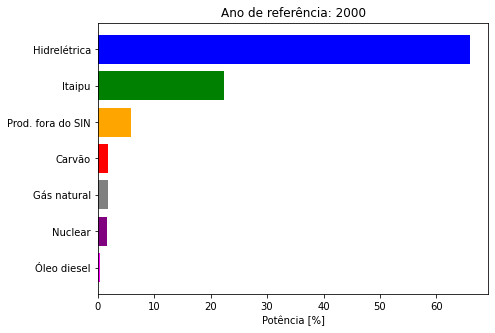

In [6]:
potenciaInicio = geracaoInicioAgrupada_ordenado[0:7].tolist()
fontesInicio = ['Hidrelétrica', 'Itaipu', 'Prod. fora do SIN', 'Carvão', 'Gás natural', 'Nuclear', 'Óleo diesel']

fig, ax = plt.subplots(figsize = (7,5))
plt.barh(fontesInicio, potenciaInicio, color = ['blue', 'green', 'orange', 'red', 'grey', 'purple', 'magenta'])
plt.title('Ano de referência: 2000')
plt.xlabel('Potência [%]')
ax.invert_yaxis() 
#plt.savefig('graf_2000.png', format='png')

## Análise do ano de referência final da série histórica

In [7]:
geracaoFinal = geracaoFonte.query('anoReferencia in [2019]')
geracaoFinal.describe()

,ideGeracaoFonte,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia
count,132.000000,132.000000,132.000000,132.0
mean,2364.500000,4290.227074,6.500000,2019.0
std,38.249183,8105.288776,3.465203,0.0
min,2299.000000,0.000000,1.000000,2019.0
25%,2331.750000,406.498140,3.750000,2019.0
50%,2364.500000,1071.199199,6.500000,2019.0
75%,2397.250000,4857.261337,9.250000,2019.0
max,2430.000000,36333.000000,12.000000,2019.0


In [8]:
geracaoFinalAgrupada = geracaoFinal.groupby('nomFonteGeracao')['mdaEnergiaDespachadaGWh'].sum()
somaTotal = geracaoFinalAgrupada.sum()
geracaoFinalAgrupada_percentual = (geracaoFinalAgrupada / somaTotal * 100)
geracaoFinalAgrupada_percentual
geracaoFinalAgrupada_ordenado = geracaoFinalAgrupada_percentual.sort_values(ascending=False)
geracaoFinalAgrupada_ordenado

nomFonteGeracao
Hidreletricas exclusive Itaipu    61.101712
Itaipu                            11.257942
Eolicas                            9.382928
Gas Natural                        8.199968
Nuclear                            2.848001
Carvao                             2.465424
Residuos Processos Industriais     1.680007
Biomassas                          1.674401
Solar Fotovoltaica                 0.764724
Oleo Diesel / Combustivel          0.362318
Energia produzida fora do SIN      0.262577
Name: mdaEnergiaDespachadaGWh, dtype: float64

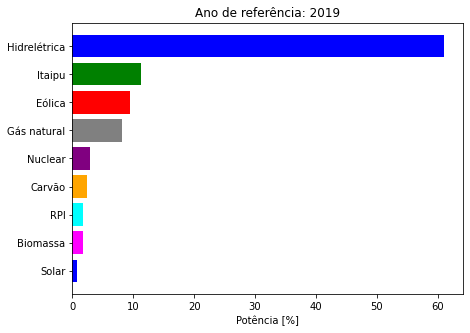

In [9]:
potenciaFinal = geracaoFinalAgrupada_ordenado[0:9].tolist()
fontesFinal = ['Hidrelétrica', 'Itaipu', 'Eólica', 'Gás natural', 'Nuclear', 'Carvão', 'RPI', 'Biomassa', 'Solar']

fig, ax = plt.subplots(figsize=(7,5))
plt.barh(fontesFinal, potenciaFinal, color = ['blue', 'green', 'red', 'grey','purple', 'orange',  'cyan', 'magenta'])
plt.title('Ano de referência: 2019')
plt.xlabel('Potência [%]')
ax.invert_yaxis() 
#plt.savefig('graf_2019.png', format='png')

C:\Users\teus_\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
C:\Users\teus_\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


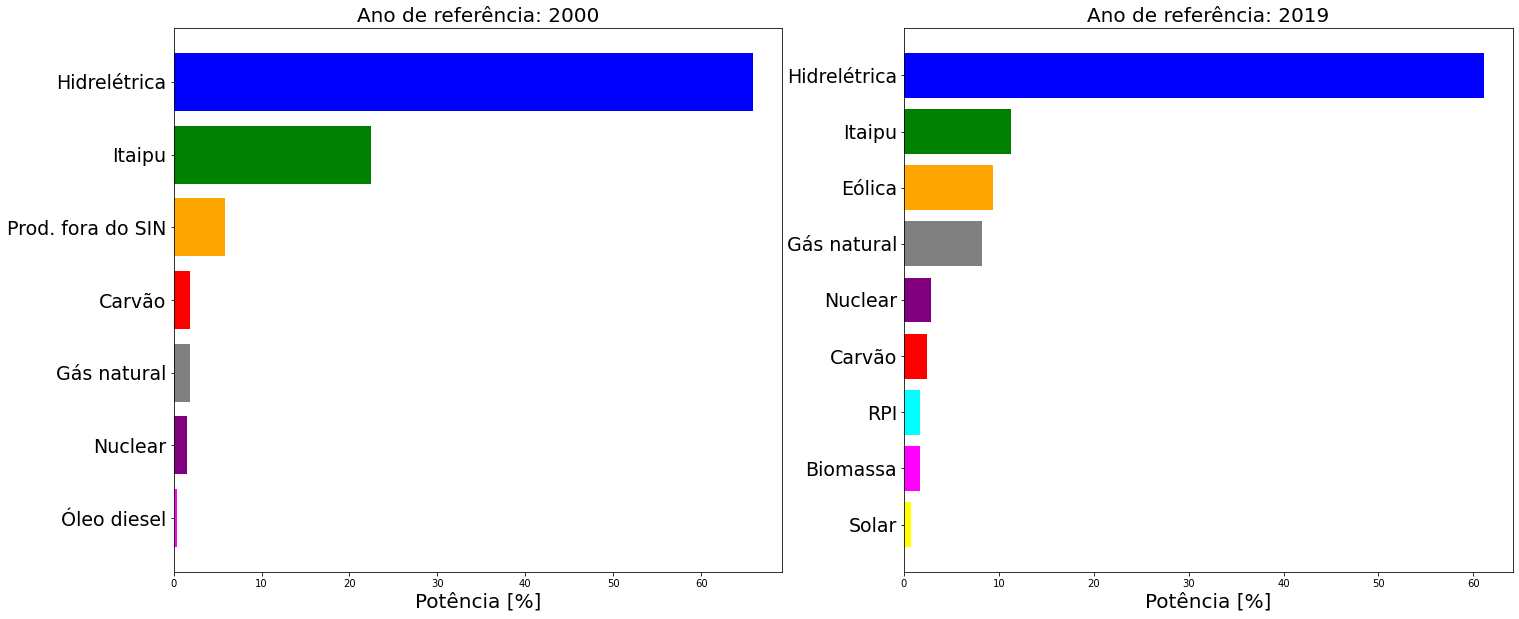

In [10]:
fig, axs = plt.subplots(1,2, figsize=(24,10))
axs[0].barh(fontesInicio, potenciaInicio, color = ['blue', 'green', 'orange', 'red', 'grey', 'purple', 'magenta'])
axs[0].set_title('Ano de referência: 2000', fontsize=20)
axs[0].set_yticklabels(fontesInicio, fontsize=19)
axs[0].set_xlabel('Potência [%]', fontsize=20)
axs[0].invert_yaxis() 

axs[1].barh(fontesFinal, potenciaFinal, color = ['blue', 'green', 'orange', 'grey', 'purple', 'red', 'cyan', 'magenta', 'yellow'])
axs[1].set_title('Ano de referência: 2019', fontsize=20)
axs[1].set_yticklabels(fontesFinal, fontsize=19)
axs[1].set_xlabel('Potência [%]', fontsize=20)
axs[1].invert_yaxis()
#plt.savefig('graf_comp.png', format='png')

## Análise de diferentes fontes

### Hidrelétrica

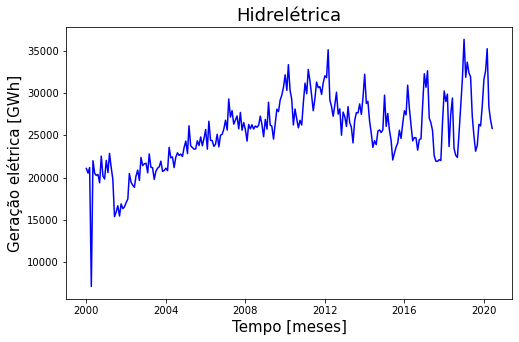

In [14]:
serietemporalHidreletrica = geracaoFonte[(geracaoFonte['nomFonteGeracao'] == 'Hidreletricas exclusive Itaipu') & (geracaoFonte['mdaEnergiaDespachadaGWh'] != 0.)]
potenciaHidreletrica = serietemporalHidreletrica['mdaEnergiaDespachadaGWh']
tempoHidreletrica = np.arange("2000-01", "2020-07", dtype="datetime64[M]")

fig = plt.subplots(figsize = (8, 5))
plt.plot(tempoHidreletrica, potenciaHidreletrica, color='blue')
plt.title('Hidrelétrica', fontsize=18)
plt.xlabel('Tempo [meses]', fontsize=15)
plt.ylabel('Geração elétrica [GWh]',  fontsize=15)
#plt.savefig('graf_hidre.png', format='png')

### Eólica

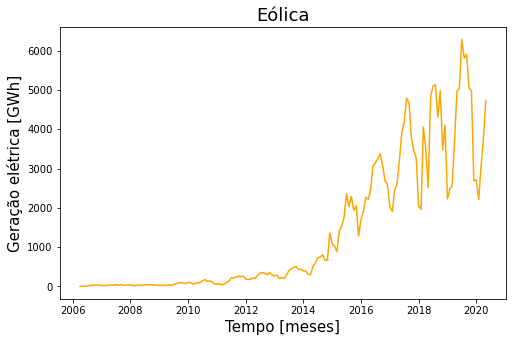

In [26]:
serietemporalEolicas = geracaoFonte[(geracaoFonte['nomFonteGeracao'] == 'Eolicas') & (geracaoFonte['mdaEnergiaDespachadaGWh'] != 0.)]
#serietemporalEolicas = serietemporalEolicas.dropna(axis=0)
potenciaEolica = serietemporalEolicas['mdaEnergiaDespachadaGWh']
tempoEolica = np.arange("2006-04", "2020-06", dtype="datetime64[M]")

fig = plt.subplots(figsize = (8, 5))
plt.plot(tempoEolica, potenciaEolica, color='orange')
plt.title('Eólica', fontsize=18)
plt.xlabel('Tempo [meses]', fontsize=15)
plt.ylabel('Geração elétrica [GWh]', fontsize=15)
#plt.savefig('graf_eolica.png', format='png')

### Biomassa

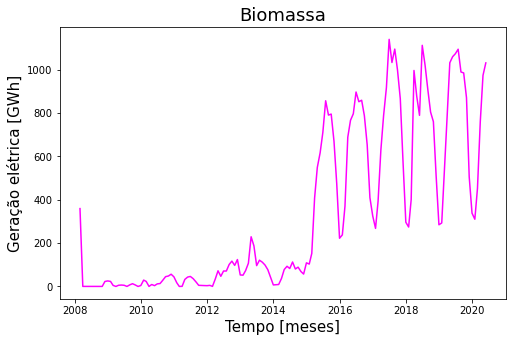

In [28]:
serietemporalBiomassa = geracaoFonte[(geracaoFonte['nomFonteGeracao'] == 'Biomassas') & (geracaoFonte['mdaEnergiaDespachadaGWh'] != 0.)]
potenciaBiomassa = serietemporalBiomassa['mdaEnergiaDespachadaGWh']
tempoBiomassa = np.arange("2008-03", "2020-07", dtype="datetime64[M]")

fig = plt.subplots(figsize = (8, 5))
plt.plot(tempoBiomassa, potenciaBiomassa, color='magenta')
plt.title('Biomassa', fontsize=18)
plt.xlabel('Tempo [meses]', fontsize=15)
plt.ylabel('Geração elétrica [GWh]', fontsize=15)
#plt.savefig('graf_biomassa.png', format='png')

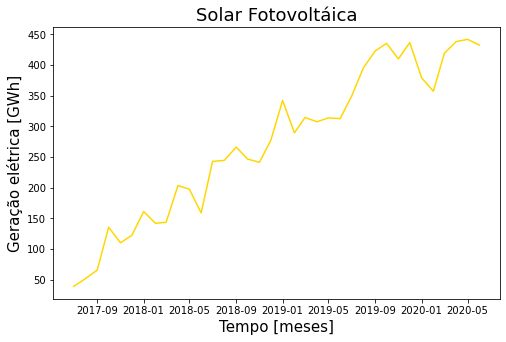

In [29]:
serietemporalFoto = geracaoFonte[(geracaoFonte['nomFonteGeracao'] == 'Solar Fotovoltaica') & (geracaoFonte['mdaEnergiaDespachadaGWh'] != 0.)]
potenciaFoto = serietemporalFoto['mdaEnergiaDespachadaGWh']
tempoFoto = np.arange("2017-07", "2020-07", dtype="datetime64[M]")

fig = plt.subplots(figsize = (8, 5))
plt.plot(tempoFoto, potenciaFoto, color='gold')
plt.title('Solar Fotovoltáica', fontsize=18)
plt.xlabel('Tempo [meses]', fontsize=15)
plt.ylabel('Geração elétrica [GWh]', fontsize=15)
#plt.savefig('graf_foto.png', format='png')

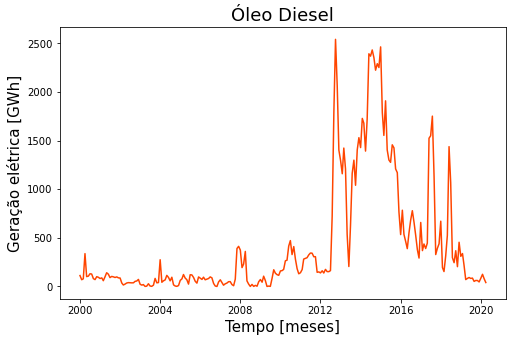

In [30]:
serietemporalOleo = geracaoFonte[(geracaoFonte['nomFonteGeracao'] == 'Oleo Diesel / Combustivel') & (geracaoFonte['mdaEnergiaDespachadaGWh'] != 0.)]
potenciaOleo = serietemporalOleo['mdaEnergiaDespachadaGWh']
tempoOleo = np.arange("2000-01", "2020-05", dtype="datetime64[M]")

fig = plt.subplots(figsize = (8, 5))
plt.plot(tempoOleo, potenciaOleo, color='orangered')
plt.title('Óleo Diesel', fontsize=18)
plt.xlabel('Tempo [meses]', fontsize=15)
plt.ylabel('Geração elétrica [GWh]', fontsize=15)
plt.savefig('graf_oleo.png', format='png')